In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [2]:
library("clustree")

Loading required package: ggraph

Loading required package: ggplot2



In [3]:
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [4]:
library(plotly)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [5]:

## remove the x-axis text and tick
## plot.margin to adjust the white space between each plot.
## ... pass any arguments to VlnPlot in Seurat
modify_vlnplot<- function(obj, 
                          feature, 
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  p<- VlnPlot(obj, features = feature, pt.size = pt.size, ... )  + 
    xlab("") + ylab(feature) + ggtitle("") + 
    theme(legend.position = "none", 
          axis.text.x = element_blank(), 
          axis.ticks.x = element_blank(), 
          axis.title.y = element_text(size = rel(1), angle = 0), 
          axis.text.y = element_text(size = rel(1)), 
          plot.margin = plot.margin ) 
  return(p)
}

## extract the max value of the y axis
extract_max<- function(p){
  ymax<- max(ggplot_build(p)$layout$panel_scales_y[[1]]$range$range)
  return(ceiling(ymax))
}


## main function
StackedVlnPlot<- function(obj, features,
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  
  plot_list<- purrr::map(features, function(x) modify_vlnplot(obj = obj,feature = x, ...))
  
  # Add back x-axis title to bottom plot. patchwork is going to support this?
  plot_list[[length(plot_list)]]<- plot_list[[length(plot_list)]] +
    theme(axis.text.x=element_text(), axis.ticks.x = element_line())
  
  # change the y-axis tick to only max value 
  ymaxs<- purrr::map_dbl(plot_list, extract_max)
  plot_list<- purrr::map2(plot_list, ymaxs, function(x,y) x + 
                            scale_y_continuous(breaks = c(y)) + 
                            expand_limits(y = y))

  p<- patchwork::wrap_plots(plotlist = plot_list, ncol = 1)
  return(p)
}

In [6]:
load("0709-pALPC3-plasma.Rda")

In [7]:
pALPC3<-plasma

In [8]:
load("0709-pALPC2-plasma.Rda")

In [9]:
pALPC2<-plasma

In [10]:
load("0709-pALPC1-plasma.Rda")

In [11]:
pALPC1<-plasma

In [12]:
load("0710-normalPC-plasma.Rda")

In [13]:
normalPC<-plasma

In [14]:
load(file="0704-plasmapublic.Rda")

In [15]:
publicPC<-plasma

In [16]:
load("0710-MGUSPC2-plasma.Rda")

In [17]:
MGUSPC2<-plasma

In [18]:
load("0709-MGUSPC1-plasma.Rda")

In [19]:
MGUSPC1<-plasma

In [20]:
pALPC1
pALPC2
pALPC3
MGUSPC1
MGUSPC2
publicPC
normalPC

An object of class Seurat 
15284 features across 3675 samples within 1 assay 
Active assay: RNA (15284 features, 3000 variable features)
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
16253 features across 1806 samples within 1 assay 
Active assay: RNA (16253 features, 3000 variable features)
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
15640 features across 4190 samples within 1 assay 
Active assay: RNA (15640 features, 3000 variable features)
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
15795 features across 1550 samples within 1 assay 
Active assay: RNA (15795 features, 3000 variable features)
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
12870 features across 1789 samples within 1 assay 
Active assay: RNA (12870 features, 3000 variable features)
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
20227 features across 717 samples within 1 assay 
Active assay: RNA (20227 features, 3000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

An object of class Seurat 
15197 features across 354 samples within 1 assay 
Active assay: RNA (15197 features, 3000 variable features)
 2 dimensional reductions calculated: pca, umap

In [21]:
publicPC@meta.data$orig.ident<-"publicPC"

In [22]:
normalPC@meta.data$orig.ident<-"normalPC"

In [23]:
MGUSPC1@meta.data$orig.ident<-"MGUSPC1"

In [24]:
MGUSPC2@meta.data$orig.ident<-"MGUSPC2"

In [25]:
pALPC1@meta.data$orig.ident<-"pALPC1"

In [26]:
pALPC2@meta.data$orig.ident<-"pALPC2"

In [27]:
pALPC3@meta.data$orig.ident<-"pALPC3"

In [28]:
allPC <- merge(MGUSPC1,y=c(MGUSPC2,pALPC1,pALPC2,pALPC3,normalPC,publicPC),project = "MGUSPAL")

Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [29]:
allPC

An object of class Seurat 
21060 features across 14081 samples within 1 assay 
Active assay: RNA (21060 features, 0 variable features)

In [30]:
all.genes <- rownames(allPC)
#RPL,RPS,MT- should be discarded
length(all.genes)

[1] 21060

In [31]:
library(stringr)
MT<-grep('MT-', all.genes, value = T)
RPL<-grep('RPL', all.genes, value = T)
RPS<-grep('RPS', all.genes, value = T)
MT
RPL
RPS

[1] "MT-ND1"  "MT-ND2"  "MT-CO1"  "MT-CO2"  "MT-ATP8" "MT-ATP6" "MT-CO3" 
 [8] "MT-ND3"  "MT-ND4L" "MT-ND4"  "MT-ND5"  "MT-ND6"  "MT-CYB"

[1] "MRPL20"         "RPL22"          "RPL11"          "MRPL37"        
  [5] "RPL5"           "MRPL9"          "MRPL24"         "MRPL55"        
  [9] "MRPL33"         "MRPL53"         "MRPL19"         "MRPL35"        
 [13] "MRPL30"         "RPL31"          "RPL37A"         "MRPL44"        
 [17] "RPL32"          "RPL15"          "RPL14"          "RPL29"         
 [21] "RPL24"          "MRPL3"          "RPL22L1"        "MRPL47"        
 [25] "RPL39L"         "RPL35A"         "RPL9"           "MRPL1"         
 [29] "RPL34-AS1"      "RPL34"          "MRPL36"         "RPL37"         
 [33] "MRPL22"         "RPL26L1"        "RPL10A"         "RPL7L1"        
 [37] "MRPL2"          "MRPL14"         "MRPL18"         "MRPL32"        
 [41] "RPL36A"         "RPL39"          "RPL10"          "MRPL15"        
 [45] "RPL7"           "RPL30"          "MRPL13"         "RPL8"          
 [49] "MRPL50"         "RPL35"          "RPL12"          "RPL7A"         
 [53] "MRPL41"         "RPLP2"          "MRPL23"         "MRPL17"        
 [57] "RPL27A"         "MRPL16"         "MRPL49"         "MRPL11"        
 [61] "MRPL21"         "MRPL48"         "MRPL43"         "MRPL51"        
 [65] "RPL41"          "MRPL42"         "RPL6"           "RPLP0"         
 [69] "MRPL57"         "RPL21"          "MRPL52"         "RPL36AL"       
 [73] "RPL4"           "RPLP1"          "MRPL46"         "MRPL28"        
 [77] "RPL3L"          "RPL13"          "RPL26"          "RPL23A"        
 [81] "MRPL45"         "RPL23"          "RPL19"          "RPL27"         
 [85] "MRPL10"         "MRPL27"         "RPL38"          "MRPL38"        
 [89] "MRPL12"         "RPL17-C18orf32" "RPL17"          "MRPL54"        
 [93] "RPL36"          "MRPL4"          "MRPL34"         "RPL18A"        
 [97] "RPL18"          "RPL13A"         "RPL28"          "MRPL40"        
[101] "RPL3"           "MRPL39"         "RPL10L"         "RPL36A-HNRNPH2"

[1] "RPS6KA1"     "MRPS15"      "RPS8"        "MRPS21"      "RPS27"      
 [6] "MRPS14"      "RPS6KC1"     "RPS7"        "RPS27A"      "MRPS5"      
[11] "MRPS9"       "MRPS25"      "RPSA"        "MRPS22"      "MRPS18C"    
[16] "RPS3A"       "MRPS30"      "MRPS36"      "MRPS27"      "RPS23"      
[21] "RPS14"       "MRPS18B"     "RPS18"       "RPS10"       "MRPS10"     
[26] "MRPS18A"     "RPS12"       "RPS6KA2"     "MRPS24"      "MRPS17"     
[31] "MRPS33"      "PRPS2"       "RPS6KA3"     "RPS4X"       "PRPS1"      
[36] "RPS20"       "MRPS28"      "TRPS1"       "RPS6"        "MRPS2"      
[41] "RPS13"       "RPS6KA4"     "RPS6KB2"     "RPS3"        "RPS25"      
[46] "MRPS16"      "RPS24"       "MRPS35"      "RPS26"       "MRPS31"     
[51] "RPS29"       "RPS6KL1"     "RPS6KA5"     "RPS27L"      "RPS17"      
[56] "MRPS11"      "MRPS34"      "RPS2"        "RPS15A"      "PRPSAP2"    
[61] "MRPS23"      "RPS6KB1"     "MRPS7"       "PRPSAP1"     "MRPS26"     
[66] "RPS21"       "RPS15"       "RPS28"       "MRPS12"      "RPS16"      
[71] "RPS19"       "RPS11"       "RPS9"        "RPS5"        "RPS4Y1"     
[76] "RPS19BP1"    "MRPS6"       "RPS6KA6"     "RPS10-NUDT3" "RPS4Y2"

In [32]:
RPS<-setdiff(RPS,c("TRPS1","PRPSAP2","PRPSAP1","PRPS2","PRPS1"))

In [33]:
all.genes<-setdiff(all.genes,RPS)
all.genes<-setdiff(all.genes,MT)
all.genes<-setdiff(all.genes,RPL)
length(all.genes)

[1] 20868

In [34]:
all.genes2<-intersect(rownames(MGUSPC1),all.genes)
MGUSPC1<-MGUSPC1[all.genes2,]

In [35]:
all.genes2<-intersect(rownames(MGUSPC2),all.genes)
MGUSPC2<-MGUSPC2[all.genes2,]

In [36]:
all.genes2<-intersect(rownames(pALPC1),all.genes)
pALPC1<-pALPC1[all.genes2,]

In [37]:
all.genes2<-intersect(rownames(pALPC2),all.genes)
pALPC2<-pALPC2[all.genes2,]

In [38]:
all.genes2<-intersect(rownames(pALPC3),all.genes)
pALPC3<-pALPC3[all.genes2,]

In [39]:
all.genes2<-intersect(rownames(normalPC),all.genes)
normalPC<-normalPC[all.genes2,]

In [40]:
all.genes2<-intersect(rownames(publicPC),all.genes)
publicPC<-publicPC[all.genes2,]

In [41]:
ob.list <- list(MGUSPC2,MGUSPC1,pALPC1,pALPC2,pALPC3,normalPC,publicPC)

In [42]:
for (i in 1:length(ob.list)) {
    ob.list[[i]]@meta.data<-ob.list[[i]]@meta.data[,c(1,2,3,4,5)]
    ob.list[[i]] <- NormalizeData(ob.list[[i]], verbose = FALSE)
    ob.list[[i]] <- FindVariableFeatures(ob.list[[i]], selection.method = "vst", nfeatures = 3000, 
        verbose = FALSE)
}

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -2.248”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.30103”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.9479e-16”


In [43]:
ob.anchors <- FindIntegrationAnchors(object.list = ob.list, dims = 1:12)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5504 anchors

Filtering anchors

	Retained 2108 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7344 anchors

Filtering anchors

	Retained 793 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6337 anchors

Filtering anchors

	Retained 663 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 5581 anchors

Filtering anchors

	Retained 1275 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4951 anchors

Filtering anchors

	Retained 1102 anchors

Running CCA

Merging objects

Finding neighborhoods

Findi

In [44]:
ob.integrated <- IntegrateData(anchorset = ob.anchors, dims = 1:12)

Merging dataset 6 into 4

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 7 into 4 6

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 4 6 7 into 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 2 into 5

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 3 4 6 7 into 5 1 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [45]:
DefaultAssay(ob.integrated) <- "integrated"

# Run the standard workflow for visualization and clustering
ob.integrated <- ScaleData(ob.integrated, verbose = FALSE)
ob.integrated <- RunPCA(ob.integrated, npcs = 20, verbose = FALSE)

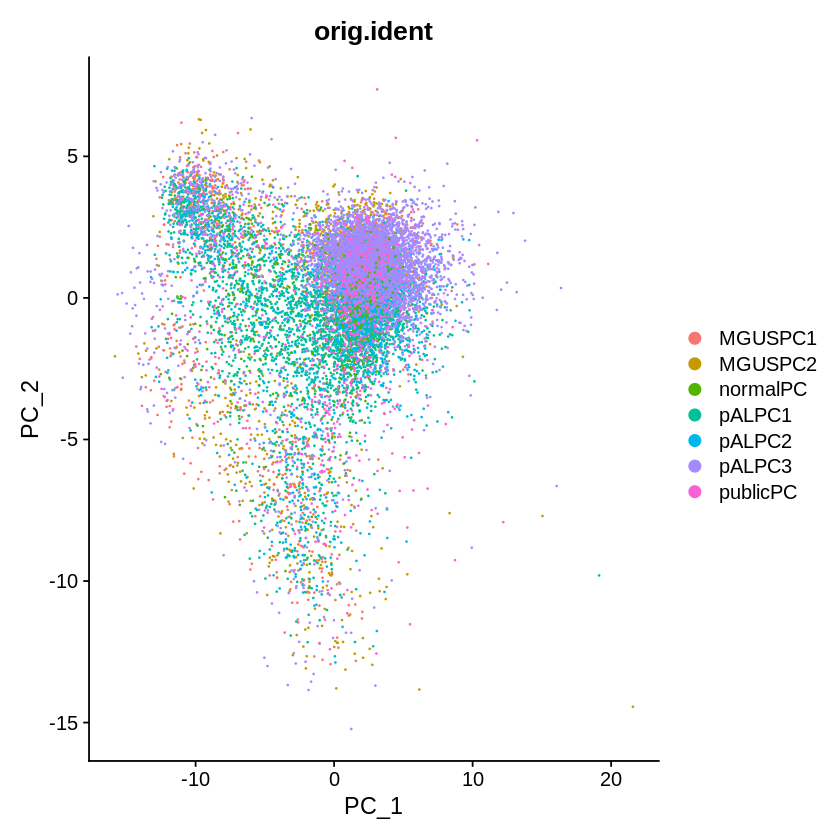

In [46]:
DimPlot(ob.integrated, reduction = "pca",group.by="orig.ident")

In [47]:
ob.integrated <- FindNeighbors(ob.integrated, dims = 1:12)
ob.integrated <- FindClusters(ob.integrated, resolution = c(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14081
Number of edges: 422138

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9327
Number of communities: 4
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14081
Number of edges: 422138

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8957
Number of communities: 6
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14081
Number of edges: 422138

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8677
Number of communities: 7
Elapsed time: 2 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14081
Number of edges: 422138

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8415
Number of communities: 7
Elapsed time: 1 seconds
Modularity Optim

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "percent.mt"             "percent.ig"             "integrated_snn_res.0.1"
 [7] "integrated_snn_res.0.2" "integrated_snn_res.0.3" "integrated_snn_res.0.4"
[10] "integrated_snn_res.0.5" "integrated_snn_res.0.6" "integrated_snn_res.0.7"
[13] "integrated_snn_res.0.8" "integrated_snn_res.0.9" "integrated_snn_res.1"  
[16] "seurat_clusters"

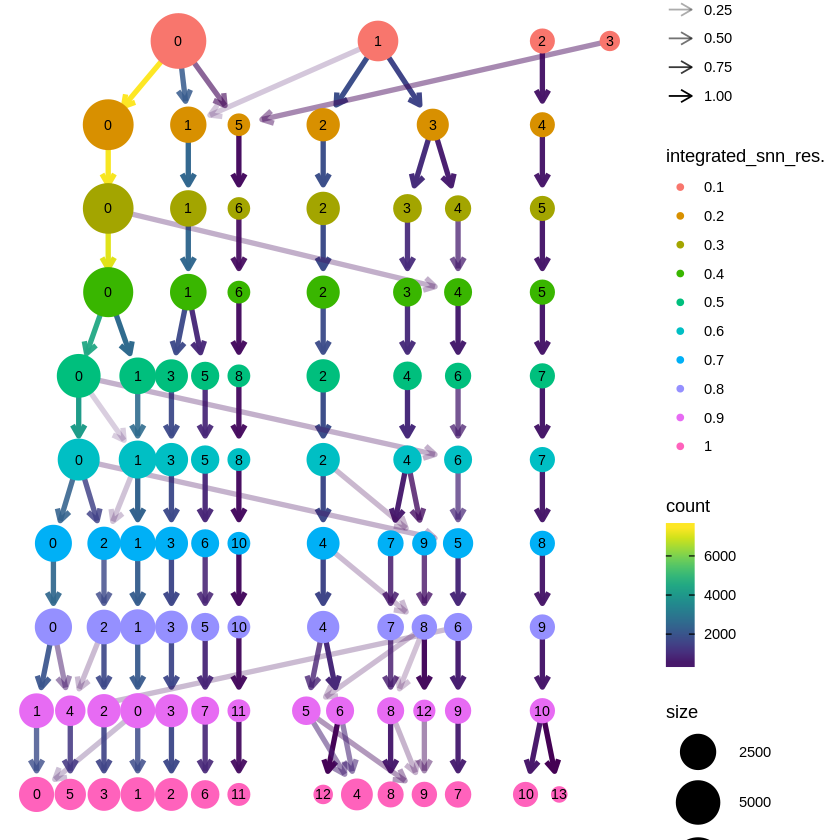

In [51]:
clustree(ob.integrated@meta.data, prefix = "integrated_snn_res.")
colnames(ob.integrated@meta.data)

In [53]:
ggsave('fig.s2.1.pdf',height=8,width=8)
dev.off()

null device 
          1

In [54]:
ob.integrated <- RunUMAP(ob.integrated, dims = 1:12)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:54:06 UMAP embedding parameters a = 0.9922 b = 1.112

18:54:06 Read 14081 rows and found 12 numeric columns

18:54:06 Using Annoy for neighbor search, n_neighbors = 30

18:54:06 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:54:07 Writing NN index file to temp file /tmp/Rtmp7Ctxhu/filea3e406a763c0c

18:54:07 Searching Annoy index using 1 thread, search_k = 3000

18:54:11 Annoy recall = 100%

18:54:12 Commencing smooth kNN distance calibration using 1 thread

18:54:12 Initializing f

In [55]:
options(repr.plot.height=8,repr.plot.width=8)

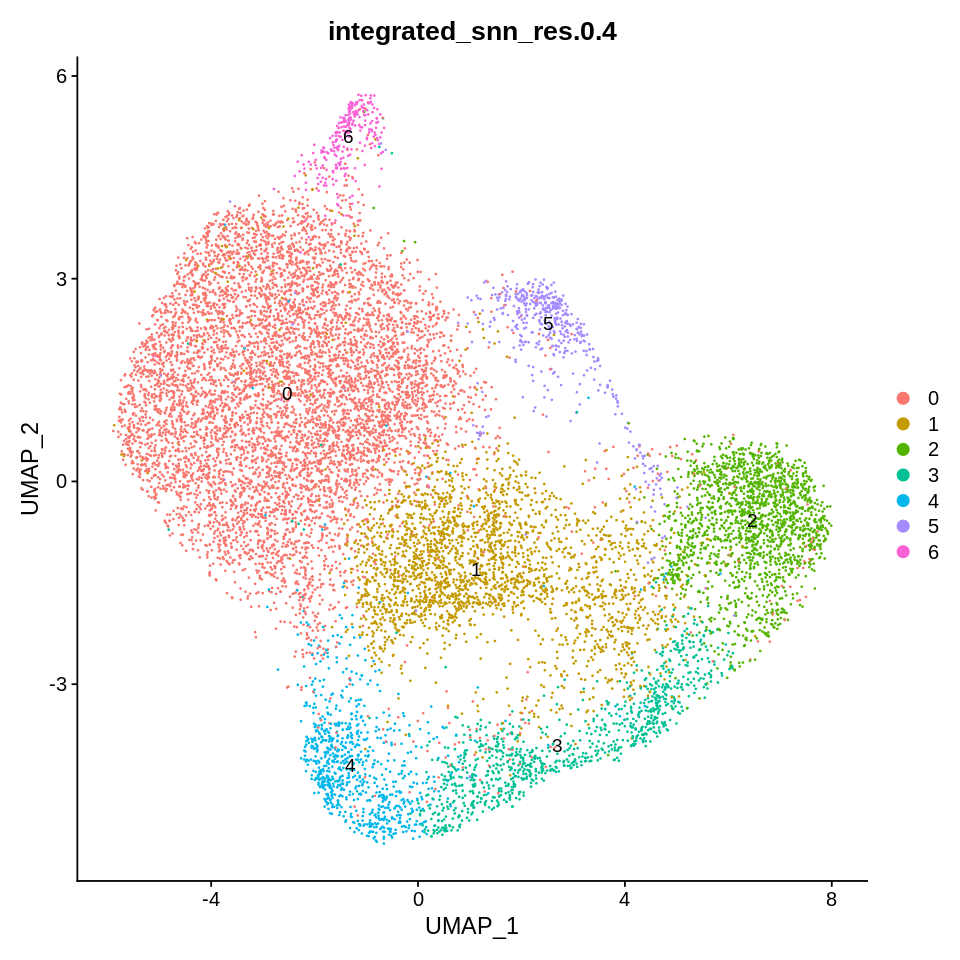

In [57]:
DimPlot(ob.integrated, reduction = "umap",group.by="integrated_snn_res.0.4",label=T)

In [58]:
ggsave("fig.1.1.pdf",height=8,width=8)
dev.off()

null device 
          1

In [59]:
options(repr.plot.height=4,repr.plot.width=20)

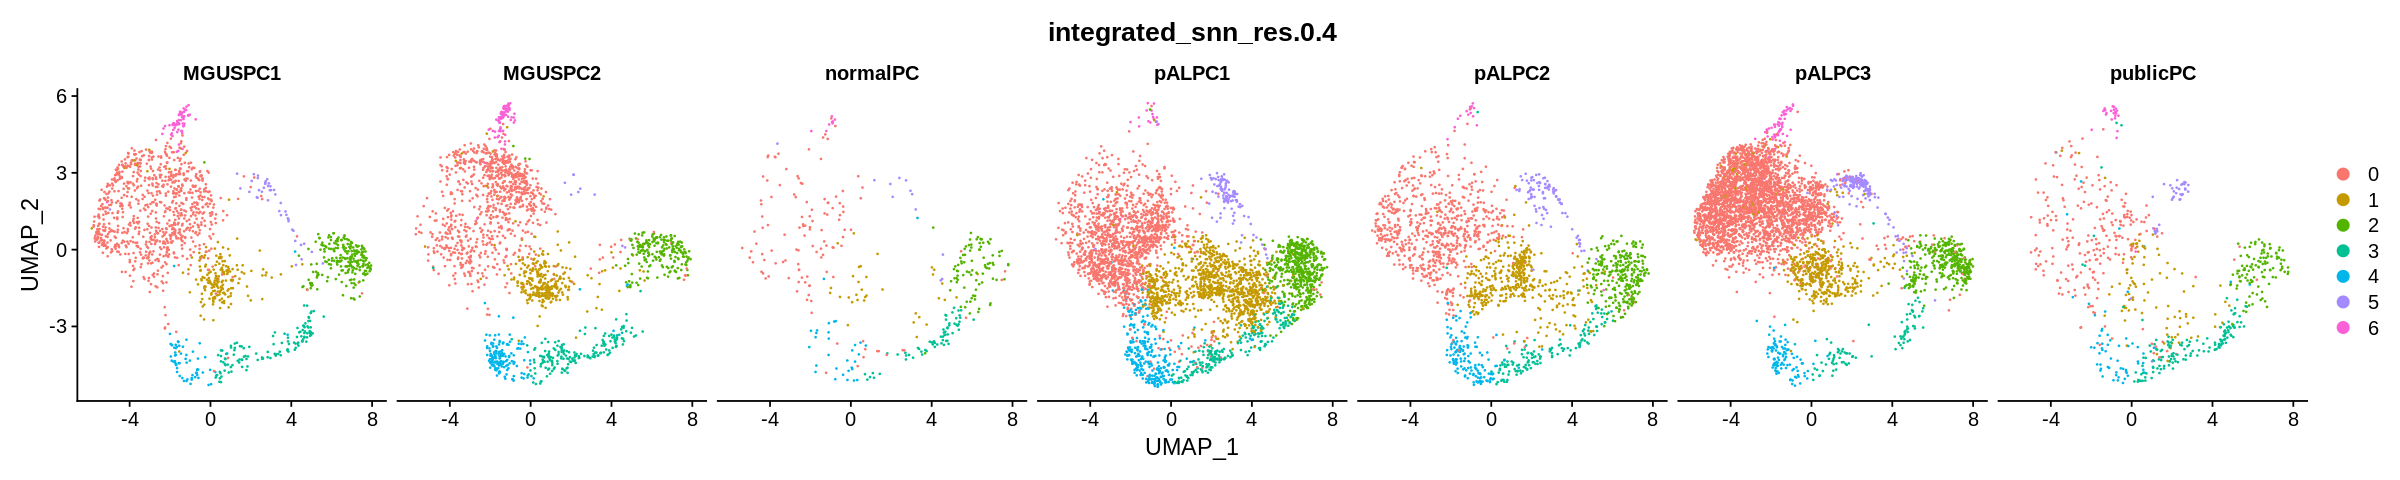

In [61]:
DimPlot(ob.integrated, reduction = "umap", split.by = "orig.ident",group.by="integrated_snn_res.0.4")

In [62]:
options(repr.plot.height=8,repr.plot.width=9)

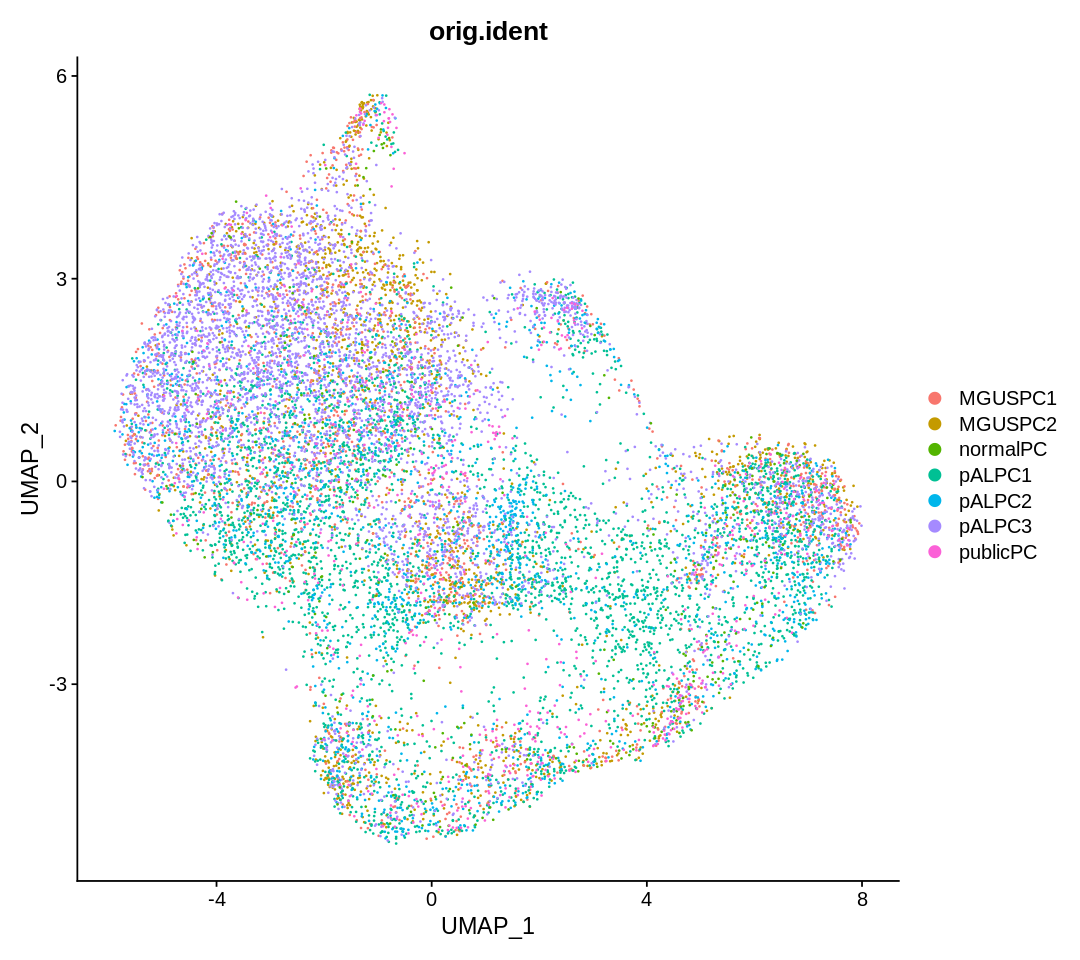

In [63]:
DimPlot(ob.integrated, reduction = "umap",group.by='orig.ident')

In [64]:
ggsave("fig.s2.2.pdf",height=8,width=9)
dev.off()

null device 
          1

In [65]:
ob.integrated <- FindNeighbors(ob.integrated, dims = 1:12)
ob.integrated <- FindClusters(ob.integrated, resolution = 0.4)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14081
Number of edges: 422138

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8415
Number of communities: 7
Elapsed time: 1 seconds


In [66]:
merge.markers <- FindAllMarkers(ob.integrated, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
merge.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,0.7550083,0.983,0.900,0.000000e+00,0,JUN
0.000000e+00,0.7446658,0.994,0.935,0.000000e+00,0,CCND1
0.000000e+00,0.6054519,0.988,0.931,0.000000e+00,0,DUSP1
0.000000e+00,0.5435797,0.985,0.944,0.000000e+00,0,FRZB
0.000000e+00,0.5350046,0.955,0.869,0.000000e+00,0,FOSB
0.000000e+00,0.4853111,0.975,0.857,0.000000e+00,0,TSC22D3
1.578285e-293,0.6570621,0.879,0.767,3.156571e-290,0,IER2
1.145185e-288,0.5274798,0.933,0.850,2.290369e-285,0,BTG2
5.338523e-245,0.5380243,0.884,0.800,1.067705e-241,0,JUNB


In [67]:
options(repr.plot.height=8,repr.plot.width=8)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



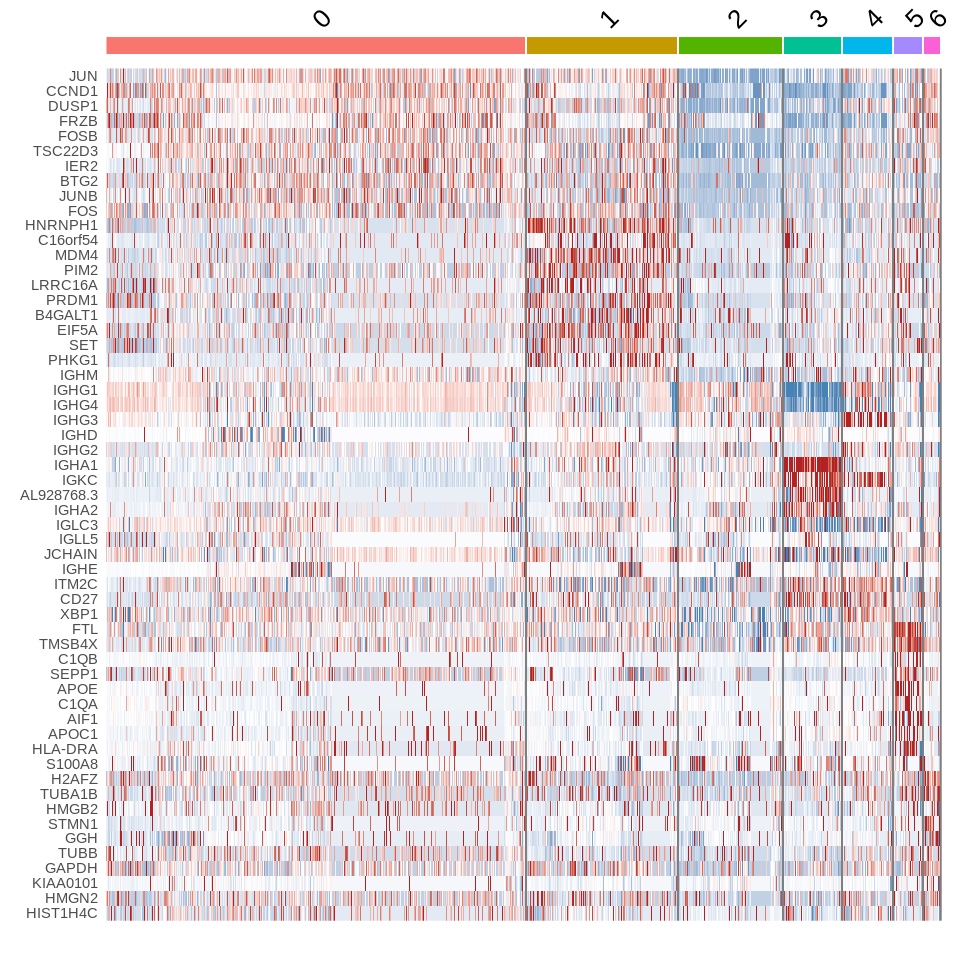

In [68]:
top10 <- merge.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
DoHeatmap(ob.integrated, features = top10$gene) +  NoLegend()+ scale_fill_gradientn(colors = c("steelblue", "white", "firebrick"))

In [70]:
ggsave("fig.1.3.pdf",height=8,width=8)
dev.off()

null device 
          1

In [73]:
allPC3<-ob.integrated

In [74]:
options(repr.plot.height=10,repr.plot.width=5)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



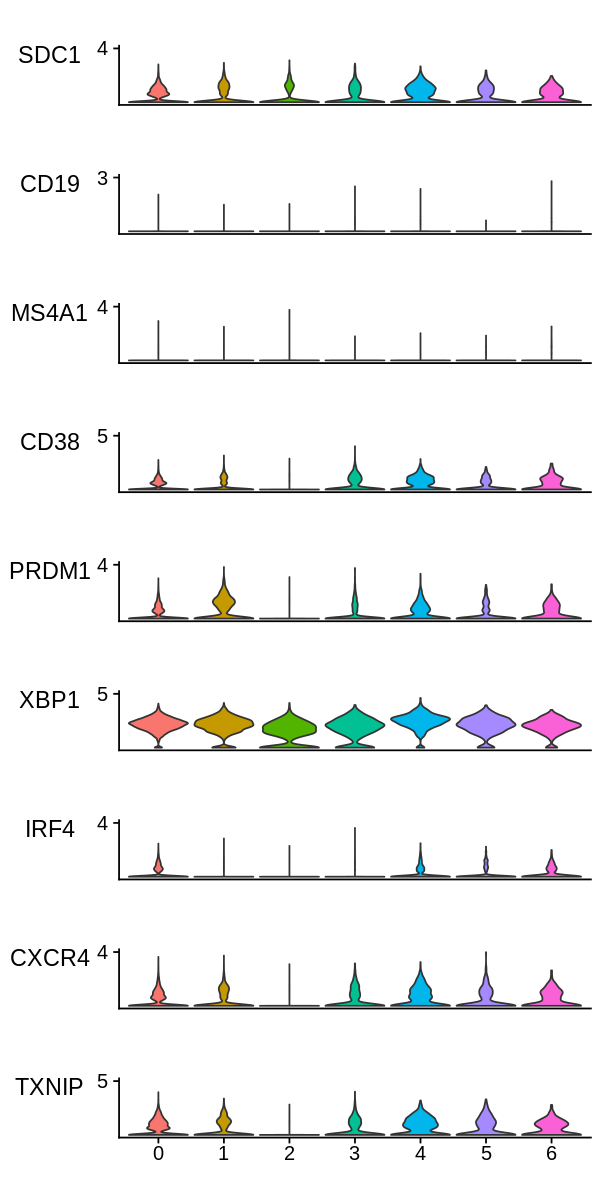

In [75]:
features<- c("SDC1","CD19","MS4A1",'CD38',"PRDM1","XBP1","IRF4","CXCR4",'TXNIP')
StackedVlnPlot(obj =allPC3, features = features,assay="RNA")

In [76]:
ggsave("fig.1.6.pdf",height=8,width=4)
dev.off()

null device 
          1

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



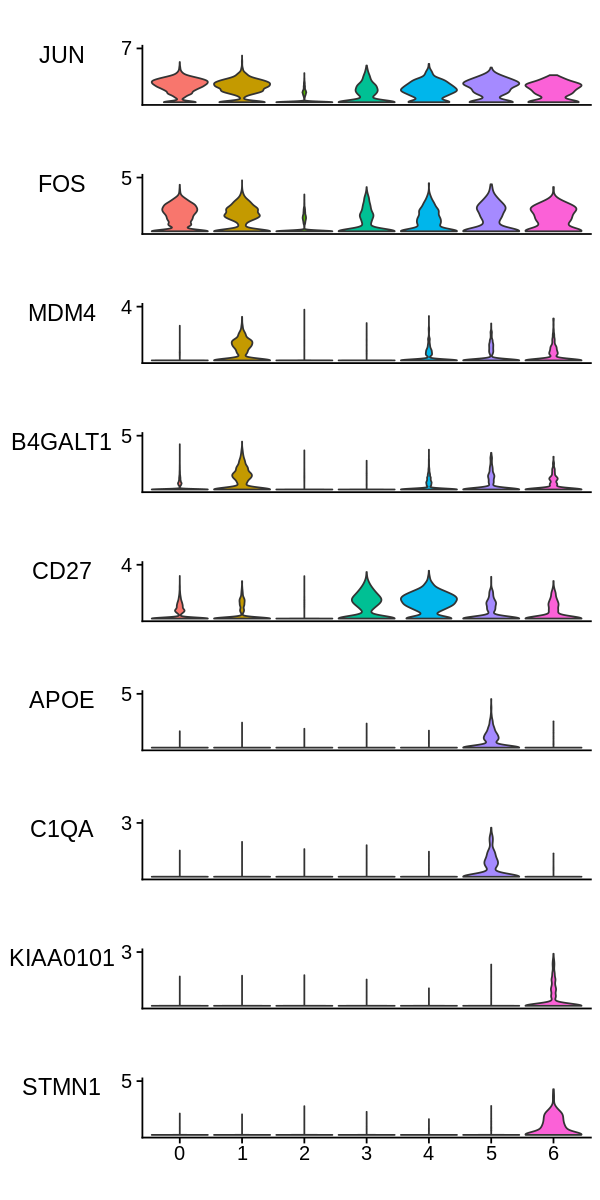

In [77]:
features<- c("JUN",'FOS','MDM4','B4GALT1','CD27','APOE','C1QA',"KIAA0101",'STMN1')
StackedVlnPlot(obj =allPC3, features = features,assay="RNA")

In [78]:
ggsave("fig.1.7.pdf",height=8,width=4)
dev.off()

null device 
          1

In [79]:
options(repr.plot.height=5,repr.plot.width=8)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




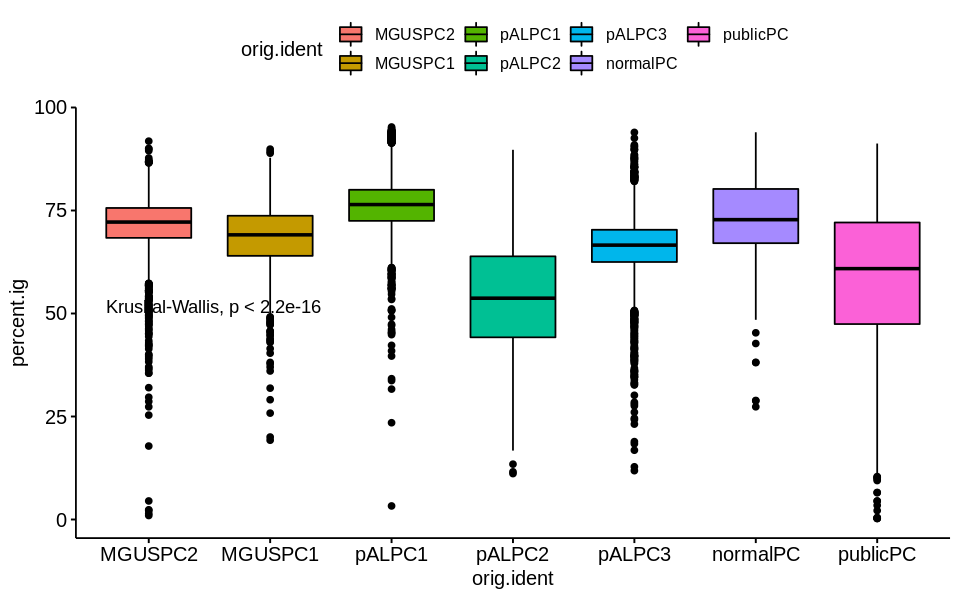

In [80]:
library(ggpubr)
library(RColorBrewer)
ggboxplot(allPC3@meta.data, x="orig.ident", y="percent.ig", fill ="orig.ident")+
  stat_compare_means(label.y = 50)

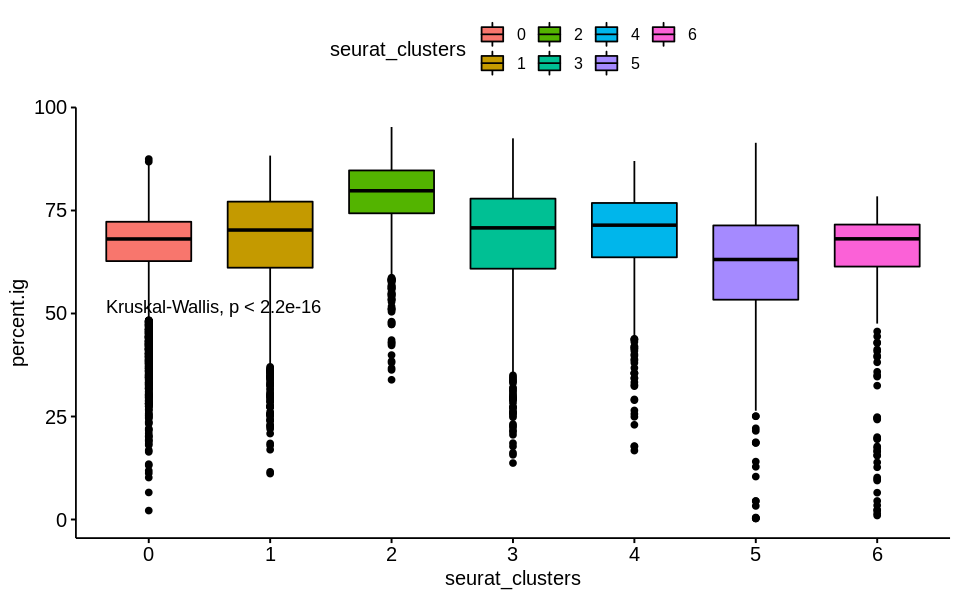

In [81]:
library(ggpubr)
library(RColorBrewer)
ggboxplot(allPC3@meta.data, x="seurat_clusters", y="percent.ig", fill ="seurat_clusters")+
  stat_compare_means(label.y = 50)

In [82]:
ggsave("fig.2.5.pdf",height=5,width=8)
dev.off()

null device 
          1

In [83]:
meta.dat<-allPC3@meta.data
colnames(meta.dat)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "percent.mt"             "percent.ig"             "integrated_snn_res.0.1"
 [7] "integrated_snn_res.0.2" "integrated_snn_res.0.3" "integrated_snn_res.0.4"
[10] "integrated_snn_res.0.5" "integrated_snn_res.0.6" "integrated_snn_res.0.7"
[13] "integrated_snn_res.0.8" "integrated_snn_res.0.9" "integrated_snn_res.1"  
[16] "seurat_clusters"

In [84]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

In [85]:
allPC5 <- CellCycleScoring(allPC3, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE,assay="RNA")

Warning message:
“The following features are not present in the object: MLF1IP, not searching for symbol synonyms”


In [86]:
options(repr.plot.height=8,repr.plot.width=8)

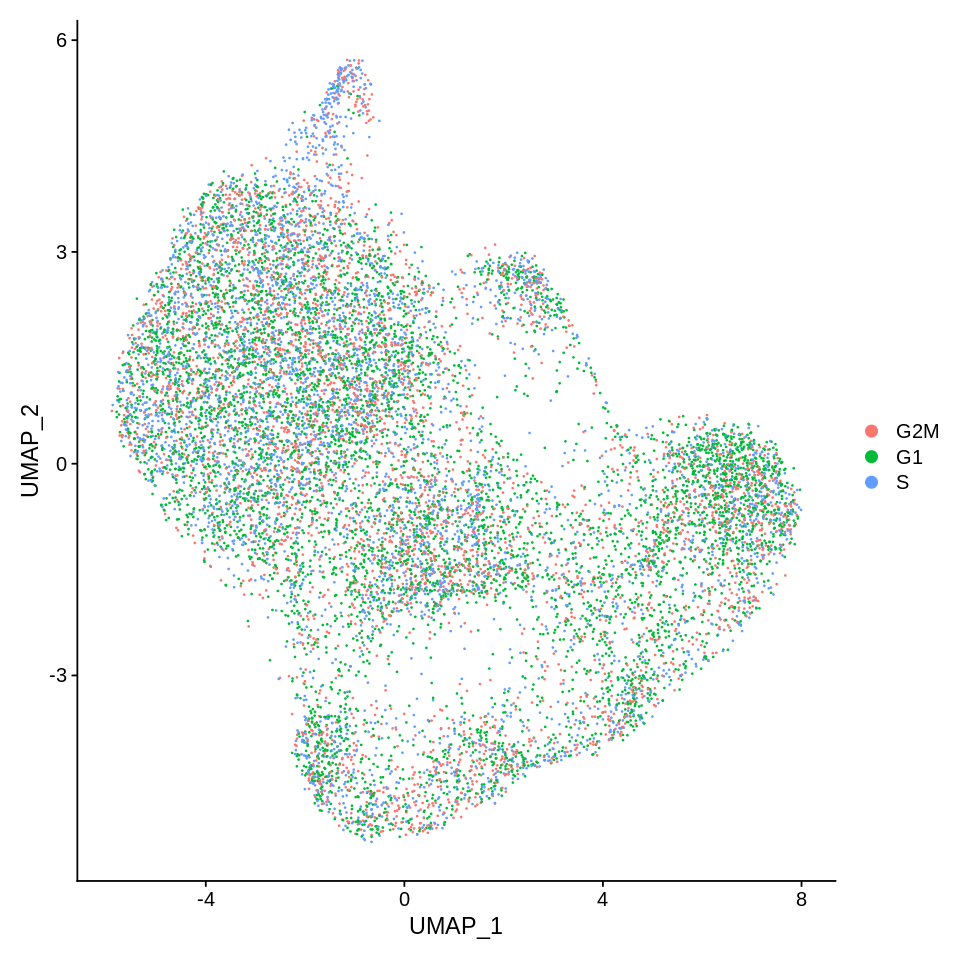

In [87]:
DimPlot(allPC5, reduction = "umap")

In [88]:
allPC43d <- RunUMAP(allPC3, dims = 1:12,n.components=3L)

19:06:54 UMAP embedding parameters a = 0.9922 b = 1.112

19:06:54 Read 14081 rows and found 12 numeric columns

19:06:54 Using Annoy for neighbor search, n_neighbors = 30

19:06:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:06:55 Writing NN index file to temp file /tmp/Rtmp7Ctxhu/filea3e405be15ed

19:06:55 Searching Annoy index using 1 thread, search_k = 3000

19:07:00 Annoy recall = 100%

19:07:00 Commencing smooth kNN distance calibration using 1 thread

19:07:01 Initializing from normalized Laplacian + noise

19:07:01 Commencing optimization for 200 epochs, with 591066 positive edges

19:07:06 Optimization finished



In [89]:
# Prepare a dataframe for cell plotting
plot.data <- FetchData(object = allPC43d, vars = c("UMAP_1", "UMAP_2", "UMAP_3", "seurat_clusters"))

# Make a column of row name identities (these will be your cell/barcode names)
plot.data$label <- paste(rownames(plot.data))


In [90]:
library("scales")
p<-plot_ly(data = plot.data, 
        x = ~UMAP_1, y = ~UMAP_2, z = ~UMAP_3, 
        color = ~seurat_clusters, 
           colors=hue_pal()(14),
        type = "scatter3d", 
        mode = "markers", 
        marker = list(size = 3, width=2), # controls size of points
        hoverinfo="text") #When you visualize your plotly object, hovering your mouse pointer over a point shows cell names

In [91]:
library(htmlwidgets)
saveWidget(p, "1004.integrate.html", selfcontained = F, libdir = "libintegrate")


Attaching package: ‘htmlwidgets’


The following object is masked from ‘package:SeuratObject’:

    JS


The following object is masked from ‘package:Seurat’:

    JS




In [92]:
meta.dat<-allPC3@meta.data
colnames(meta.dat)

[1] "orig.ident"             "nCount_RNA"             "nFeature_RNA"          
 [4] "percent.mt"             "percent.ig"             "integrated_snn_res.0.1"
 [7] "integrated_snn_res.0.2" "integrated_snn_res.0.3" "integrated_snn_res.0.4"
[10] "integrated_snn_res.0.5" "integrated_snn_res.0.6" "integrated_snn_res.0.7"
[13] "integrated_snn_res.0.8" "integrated_snn_res.0.9" "integrated_snn_res.1"  
[16] "seurat_clusters"

In [93]:
meta<-meta.dat[,c(1,16)]

In [94]:
try<-as.data.frame(table(meta))
try

orig.ident,seurat_clusters,Freq
<fct>,<fct>,<int>
MGUSPC1,0,842
MGUSPC2,0,855
normalPC,0,122
pALPC1,0,1468
pALPC2,0,702
pALPC3,0,2956
publicPC,0,240
MGUSPC1,1,191
MGUSPC2,1,300


In [95]:
trygl2<-try[order(try[,1],decreasing=T),]
trygl2

,orig.ident,seurat_clusters,Freq
,<fct>,<fct>,<int>
7,publicPC,0,240
14,publicPC,1,94
21,publicPC,2,110
28,publicPC,3,151
35,publicPC,4,60
42,publicPC,5,38
49,publicPC,6,24
6,pALPC3,0,2956
13,pALPC3,1,451


In [96]:
tryglall<-data.frame()
trygl<-trygl2[1:7,]
trygl$Freq<-trygl$Freq/colSums(trygl[,2:3][2])
tryglall<-rbind(tryglall,trygl)
trygl<-trygl2[8:14,]
trygl$Freq<-trygl$Freq/colSums(trygl[,2:3][2])
tryglall<-rbind(tryglall,trygl)
trygl<-trygl2[15:21,]
trygl$Freq<-trygl$Freq/colSums(trygl[,2:3][2])
tryglall<-rbind(tryglall,trygl)
trygl<-trygl2[22:28,]
trygl$Freq<-trygl$Freq/colSums(trygl[,2:3][2])
tryglall<-rbind(tryglall,trygl)
trygl<-trygl2[29:35,]
trygl$Freq<-trygl$Freq/colSums(trygl[,2:3][2])
tryglall<-rbind(tryglall,trygl)
trygl<-trygl2[36:42,]
trygl$Freq<-trygl$Freq/colSums(trygl[,2:3][2])
tryglall<-rbind(tryglall,trygl)
trygl<-trygl2[43:49,]
trygl$Freq<-trygl$Freq/colSums(trygl[,2:3][2])
tryglall<-rbind(tryglall,trygl)
tryglall

,orig.ident,seurat_clusters,Freq
,<fct>,<fct>,<dbl>
7,publicPC,0,0.334728033
14,publicPC,1,0.131101813
21,publicPC,2,0.153417015
28,publicPC,3,0.210599721
35,publicPC,4,0.083682008
42,publicPC,5,0.052998605
49,publicPC,6,0.033472803
6,pALPC3,0,0.705489260
13,pALPC3,1,0.107637232


In [97]:
tryglall$pose<-tryglall$Freq
tryglall$pose<- 100*tryglall$pose
tryglall$pose<-round(tryglall$pose, digits = 1)
tryglall$pose<-paste(tryglall$pose,'%',sep='')

In [98]:
options(repr.plot.height=8,repr.plot.width=8)

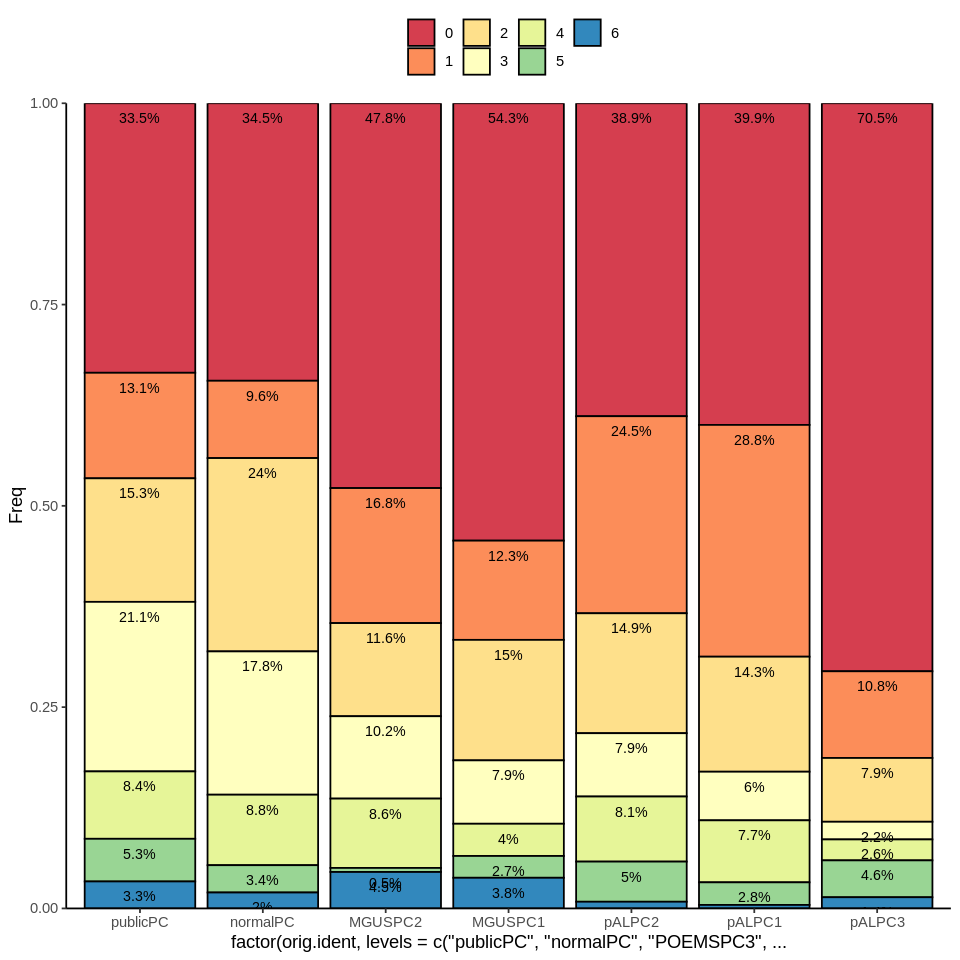

In [99]:
library(RColorBrewer)
library(ggplot2)
ggplot(tryglall, aes(x=factor(orig.ident,levels=c("publicPC","normalPC","POEMSPC3","POEMSPC1","MGUSPC2","MGUSPC1","pALPC2","pALPC1","pALPC3")),y=Freq, fill=seurat_clusters)) +
  geom_bar(stat="identity",color="black") +
  scale_y_continuous(expand=c(0,0))+
 scale_fill_brewer(palette = "Spectral")+
  theme_classic()+
theme(legend.position = "top")+
 guides(fill=guide_legend(title=NULL)) +
geom_text(aes(label = pose), size = 3, hjust = 0.5, vjust = 2, position =     "stack") 
ggsave('0715-labeledstack.1.pdf',width=6,height=6)

In [100]:
tryblall<-data.frame()
trybl<-try[1:7,]
trybl$Freq<-trybl$Freq/colSums(trybl[,2:3][2])
tryblall<-rbind(tryblall,trybl)
trybl<-try[8:14,]
trybl$Freq<-trybl$Freq/colSums(trybl[,2:3][2])
tryblall<-rbind(tryblall,trybl)
trybl<-try[15:21,]
trybl$Freq<-trybl$Freq/colSums(trybl[,2:3][2])
tryblall<-rbind(tryblall,trybl)
trybl<-try[22:28,]
trybl$Freq<-trybl$Freq/colSums(trybl[,2:3][2])
tryblall<-rbind(tryblall,trybl)
trybl<-try[29:35,]
trybl$Freq<-trybl$Freq/colSums(trybl[,2:3][2])
tryblall<-rbind(tryblall,trybl)
trybl<-try[36:42,]
trybl$Freq<-trybl$Freq/colSums(trybl[,2:3][2])
tryblall<-rbind(tryblall,trybl)
trybl<-try[43:49,]
trybl$Freq<-trybl$Freq/colSums(trybl[,2:3][2])
tryblall<-rbind(tryblall,trybl)
tryblall

,orig.ident,seurat_clusters,Freq
,<fct>,<fct>,<dbl>
1,MGUSPC1,0,0.11718859
2,MGUSPC2,0,0.11899791
3,normalPC,0,0.01697982
4,pALPC1,0,0.20431454
5,pALPC2,0,0.09770355
6,pALPC3,0,0.41141267
7,publicPC,0,0.03340292
8,MGUSPC1,1,0.07431907
9,MGUSPC2,1,0.11673152


In [101]:
tryblall$pose<-tryblall$Freq
tryblall$pose<- 100*tryblall$pose
tryblall$pose<-round(tryblall$pose, digits = 1)
tryblall$pose<-paste(tryblall$pose,'%',sep='')

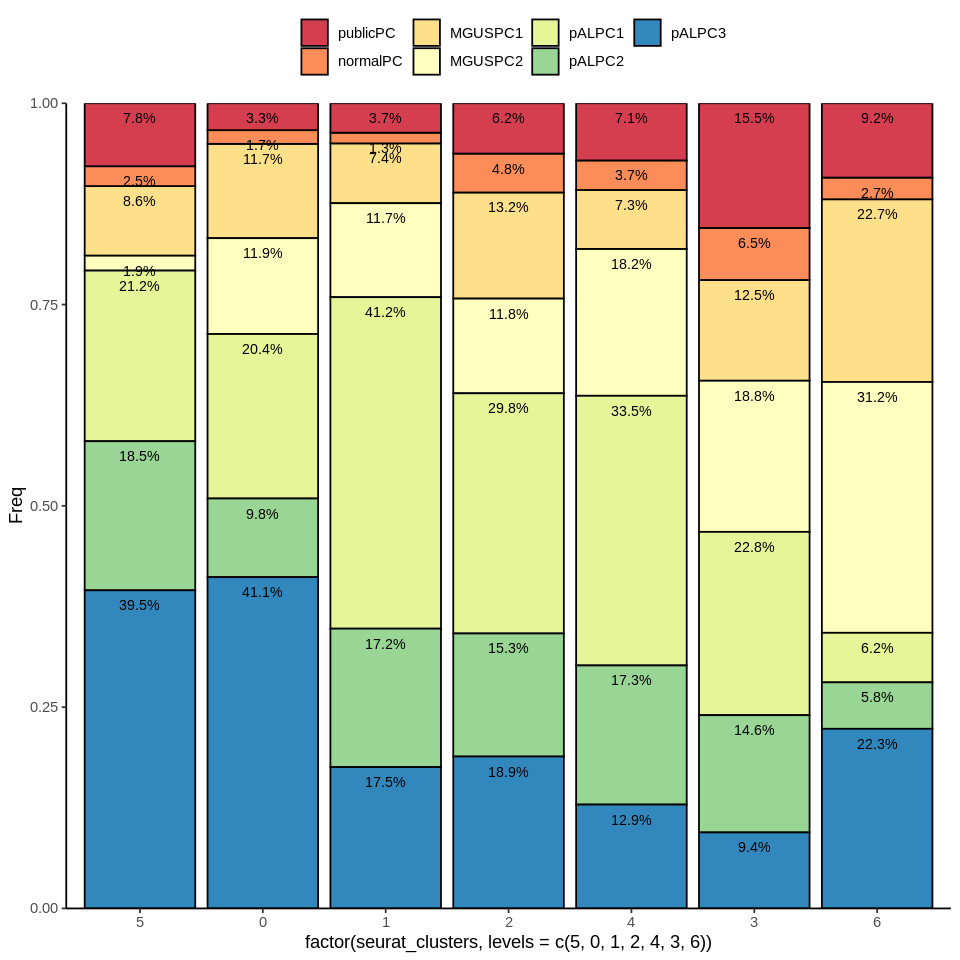

In [102]:
library(ggplot2)
ggplot(tryblall, aes(x=factor(seurat_clusters,levels=c(5,0,1,2,4,3,6)),y=Freq,fill=factor(orig.ident,levels=c("publicPC","normalPC","POEMSPC1","POEMSPC3","MGUSPC1","MGUSPC2","MGUSPC3","pALPC1","pALPC2","pALPC3")))) +
  geom_bar(stat="identity",color="black") +
  scale_y_continuous(expand=c(0,0))+
 scale_fill_brewer(palette = "Spectral")+
  theme_classic()+
theme(legend.position = "top")+
 guides(fill=guide_legend(title=NULL))+
geom_text(aes(label = pose), size = 3, hjust = 0.5, vjust = 2, position =     "stack") 
ggsave('0715-labeledstack.2.pdf',width=6,height=6)

In [103]:
save(allPC3,file="0711-ob.integratve-7samples.Rda")